# Tarefa, manipulação de contornos paramétricos

Imagens NIST

## Load database

In [1]:
import sys
sys.path.append('../')
import sarpy.binaryScale 
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import load_nist
from sarpy import extractContours

dataset = load_nist()
%load_ext autoreload
%autoreload 2

print(len(dataset['bitmaps']), "images")
print(len(dataset['names']), "class")

6200 images
62 class


## Funções auxiliares

In [2]:
def gridVisualize(data, ncols,size, f):
    plt.rcParams["figure.figsize"] = (size[0],size[1])
    x = ncols;
    y = int(np.floor(len(data)/x))
    fig = 0
    axes = 0
    if y <= 1:
        y = 1
        fig, axes = plt.subplots(1,x)
    else:
        fig, axes = plt.subplots(y+1,x)    
    k = 0
    for i in range(0,y+1):
        for j in range(0,x):
            if i*x+j < len(data):                
#                 print(y,x,i,j,k)
                if y <= 1:
                    axes[j].axis('off')
                    axes[j].imshow(f(data[k]),cmap='gray')
                else:
                    axes[i,j].axis('off')
                    axes[i,j].imshow(f(data[k]),cmap='gray')
                k = k + 1
            else:
                if y <=1 :
                    axes[j].axis('off')
                else:
                    axes[i,j].axis('off')                
    plt.show()

    
def fun(c,l=100): #problem type extractContours.extract_contours
    nrows = c.shape[0]
    a = np.array([0,0,0])
    for i in c[:]:
        a = np.vstack((a,i))
    a = a[1::]    
    b = np.array(a[0])
    for i in range(1,l):
        idx = int(np.floor(nrows*i/l))
        b = np.vstack((b,a[idx]))
    return b

f_iden = lambda arg1 : arg1;

## Imagens 

- Imagens da mesma classe

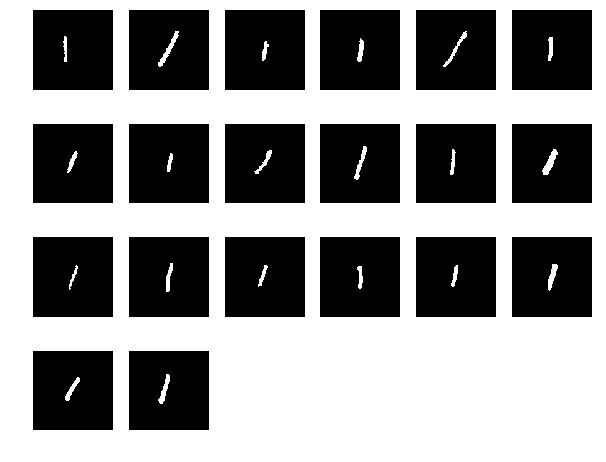

In [3]:
list_images = [];
for i in range(100,120):
    list_images.append(dataset['bitmaps'][i])

gridVisualize(list_images,6,(10,8),f_iden)

## Normalizaçaõ de imagens
    - Tamanho ....
    - Deslocação ....
    -
    -

## Extract contours

    - Extrai o contorno parametrico das imagens

In [4]:
numbins = 100
list_con = []
arr_x = np.arange(0,numbins)

for img in list_images:
    aContour = extractContours.extract_contours(img)
    c = fun(aContour[0],numbins) # problem type in aContour
    list_con.append(c)
    
array_con = np.array(list_con)

## Mean and Standard deviation 

    - Calcula a média aritmética para os eixos X e Y do contorno parametrico
    - Calcula a desvio padrão para os eixos X e Y do contorno parametrico

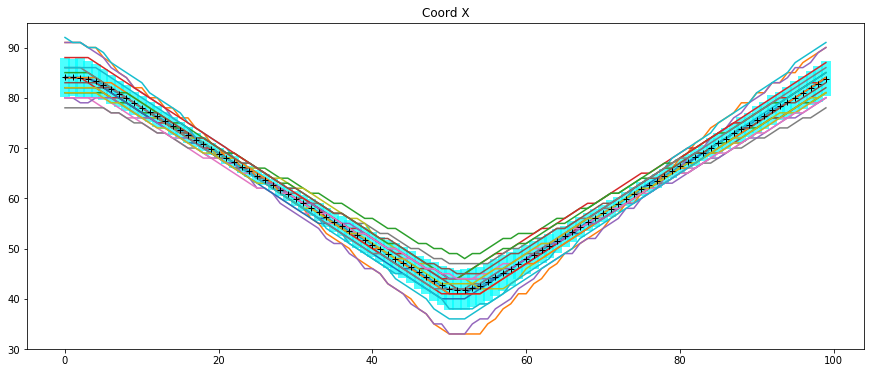

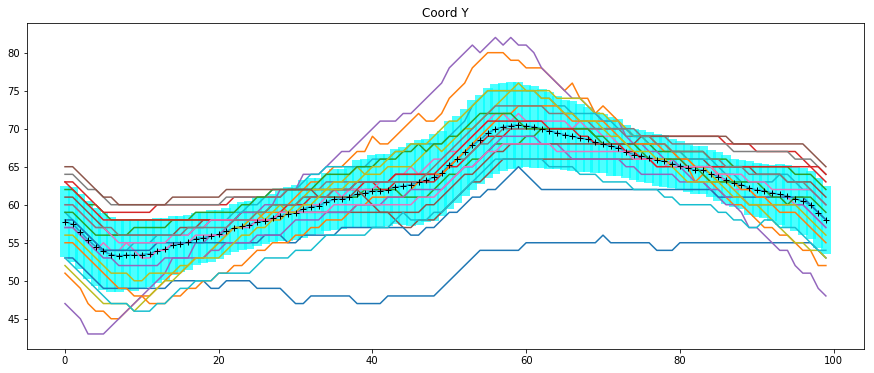

In [5]:
mm = np.mean(array_con,axis=0)
std = np.std(array_con,axis=0)

plt.rcParams["figure.figsize"] = [15,6]
for idx,title in zip([1,2],["Coord X","Coord Y"]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for contour in array_con:
        ax.plot(arr_x, contour[:,idx])
    ax.plot(arr_x, mm[:,idx],'+', color="black")
    plt.title(title)
    plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
    plt.show()

219


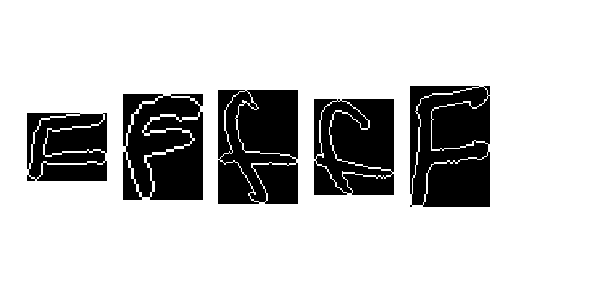

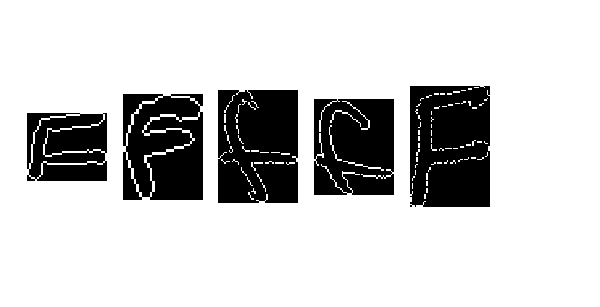

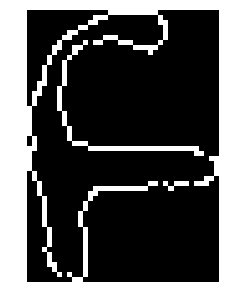

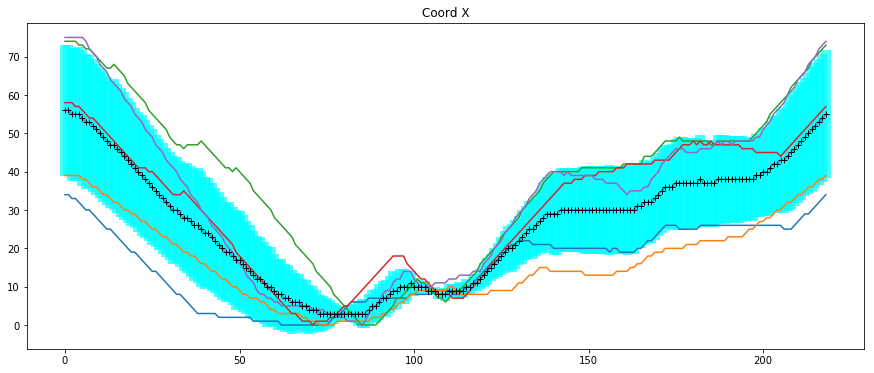

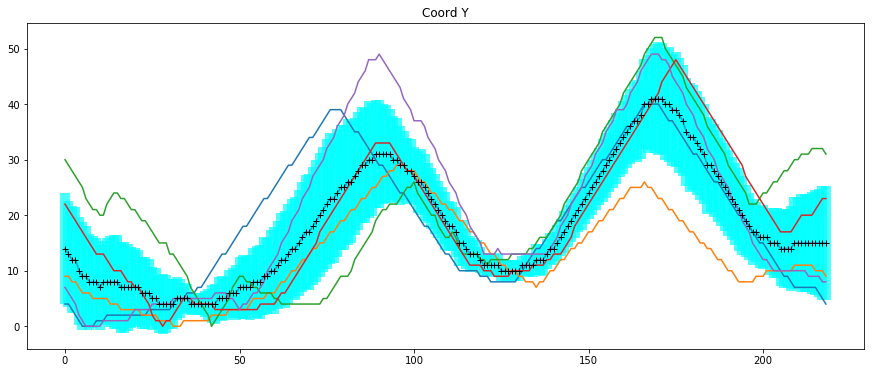

In [7]:
from sarpy import plotContour
"""
Função principal 
"""

def process (list_images):
#     gridVisualize(list_images,6,(10,5),plotContour.contour2bm)
    ##
    sum_peri = 0
    list_con = []
    for img in list_images:
        aContour = extractContours.extract_contours(img)
        sum_peri = sum_peri + len(aContour[0])
        list_con.append(aContour[0])
               
    numbins = int(sum_peri/len(list_con))
    print(numbins)
    arr_x = np.arange(0,numbins)
    array_con = np.asarray(list_con)
    array_cont_ini = array_con.copy
    gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    ##
    for i in range(0,len(array_con)):        
        c = fun(array_con[i],numbins) # problem type in aContour        
        c = c - np.min(c,axis=0)
        array_con[i] = np.array(c)
    ##
    gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    mm = np.mean(array_con,axis=0)
    std = np.std(array_con,axis=0)
    ##
    mm_n = mm - np.min(mm,axis=0)
    size = np.max(mm_n,axis=0)
    img_mm = np.zeros((int(size[1])+1,int(size[2])+1))
    for b in mm_n:
        img_mm[int(b[1])][int(b[2])] = 1
    plt.imshow(img_mm,cmap='gray')
    plt.axis('off')
    plt.show()
    ##
    plt.rcParams["figure.figsize"] = [15,6]
    for idx,title in zip([1,2],["Coord X","Coord Y"]):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for contour in array_con:
            ax.plot(arr_x, contour[:,idx])        
        ax.plot(arr_x, mm[:,idx],'+', color="black")
        plt.title(title)
        plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
        plt.show()
    
"""
###
# Example para imagens aleatórias 
#
"""    
# for c in range(0,62,10):
for c in range(15,16):
    list_images = [];
    for i in range(c*100,c*100+5):
        list_images.append(dataset['bitmaps'][i])
    process(list_images)

In [ ]:
from sarpy import plotContour
from math import *
from scipy.misc import imresize
"""
Função principal 
"""
def shapeScale2(img, c):
    if type(c) == type((0,0)):
        h2 = floor(c[0])
        w2 = floor(c[1])
    else:
        raise ValueError('Error in arguments')
        
    h1,w1=img.shape
    x_ratio = w1/w2;
    y_ratio = h1/h2;    
    g = np.zeros(h2*w2)
    for i in range(h2):
        for j in range(w2):
            px = floor(j*x_ratio) ;
            py = floor(i*y_ratio) ;
            g[(i*w2)+j] = img[py][px];
    g = g.reshape(h2,w2)
    return g;

def contour2bm2 (c):
    if (type(c) == type(np.array(()))) & (c.shape[1] >= 3):        
        #
#         print("--->",c.shape)
        copy = c.copy()
        copy = copy - np.min(copy,axis=0)
        #
        maxv = np.max(copy,axis=0)
        img = np.zeros((maxv[1]+1,maxv[2]+1), dtype='int8')
        for i in range(c.shape[0]):
            x = copy[i,1]
            y = copy[i,2]
            img[x,y] = 1
        return img;
    else:
        raise ValueError('Error: the argument has to be a contour')        
        
def bitmap2setPoints(bitmap,adj=4):
    adjx = []
    adjy = []
    if adj == 8:
        adjx = [-1,0,1,-1,1,-1,0,1];
        adjy = [-1,-1,-1,0,0,1,1,1];
    else:
        adjx = [0,-1,1,0];
        adjy = [-1,0,0,1];
        
    adjn = len(adjx)
    nrows,ncols = bitmap.shape
    setPoints = set();
    for i in range(0,nrows):
        for j in range(0,ncols):
            if bitmap[i,j] == 1:
                for dx,dy in zip(adjx,adjy):        
                    x = i + dx
                    y = j + dy
                    if x >= 0 and x < ncols and y >=0 and y < nrows:
                        if bitmap[x,y] == 0:                        
                            setPoints.add(tuple([x,y]))
    
    return np.asarray(list(setPoints))

def getBMnormalized(list_images):
    
    list_con = []
    for img in list_images:
        list_con.append(extractContours.extract_contours(img)[0])
#         xx = bitmap2setPoints(img)
#         list_con.append(xx - np.min(xx,axis=0))
        
    list_bm = []
    for img in list_con:
        list_bm.append(contour2bm2(img))
#         s = np.max(img,axis=0)
#         xx = np.zeros((s[0]+1,s[1]+1))
#         for c in img:
#             xx[c[0]][c[1]] = 1
#         list_bm.append(xx)

    for img in list_bm: 
        plt.imshow(img)
        plt.show()
        
    a = np.asarray([0,0])
    for img in list_bm:
        print(img.shape)
        a = img.shape + a

    a = a/len(list_bm)
    list_normal = []    
    for img in list_bm:
        t = imresize(img,(floor(a[0]),floor(a[1])),'nearest','L')
#         (‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic’)
        t = np.where(t > 0 , 1, 0)  
#         print("shape-",t.shape)
        print(t)
        list_normal.append(t)
        #list_normal.append(shapeScale2(img,(a[0],a[1])))    
    
    for img in list_normal: 
        plt.imshow(img)
        plt.show()
        
    return list_normal                   

def getCTnormalized(list_images):
    
    list_con = []
    for img in list_images:
        print(img.shape)
#         list_con.append(extractContours.extract_contours(img)[0])
 
    
# for c in range(0,62,10):
for c in range(15,16):
    list_images = [];
    for i in range(c*100,c*100+3):
        list_images.append(dataset['bitmaps'][i])
    
    print(len(list_images))
    lCont = getBMnormalized(list_images)
    ctnorm = getCTnormalized(lCont)
    
    
    
    

In [ ]:
import numpy as np
a = np.array([np.array([[1,5,3],[4,2,6]]),np.array([[9,5,7],[6,8,4]])])
print(a)
print(a.shape)
print("------")
print(np.max(a,axis=0))


Original images


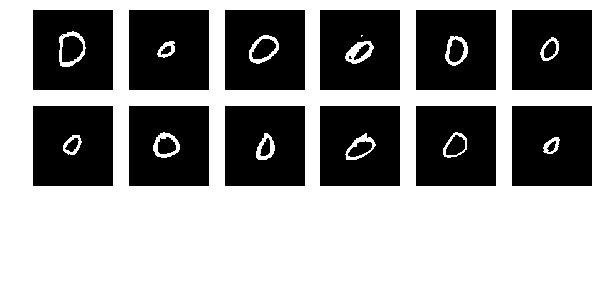

Shapes


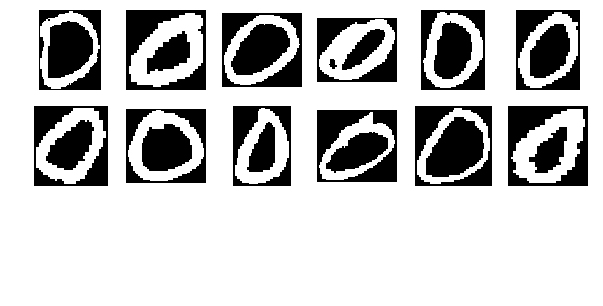

Shapes normalized


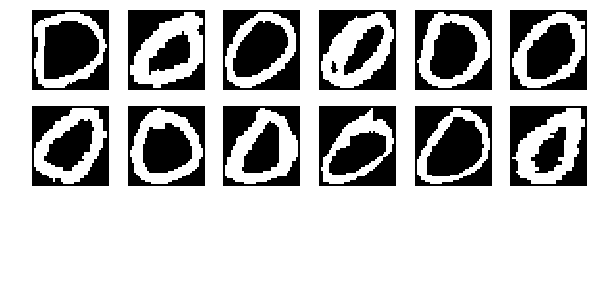

Contours


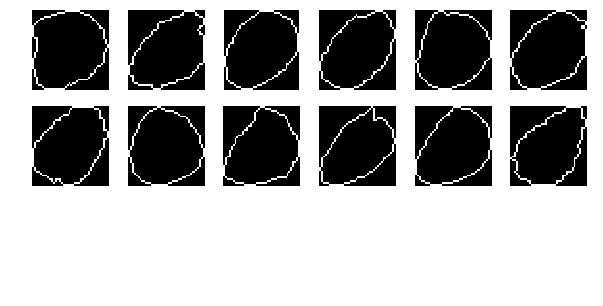

Arithmetic mean contour


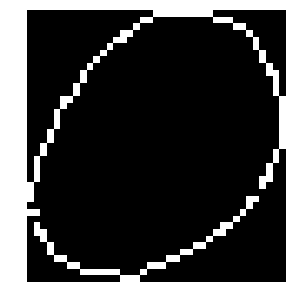

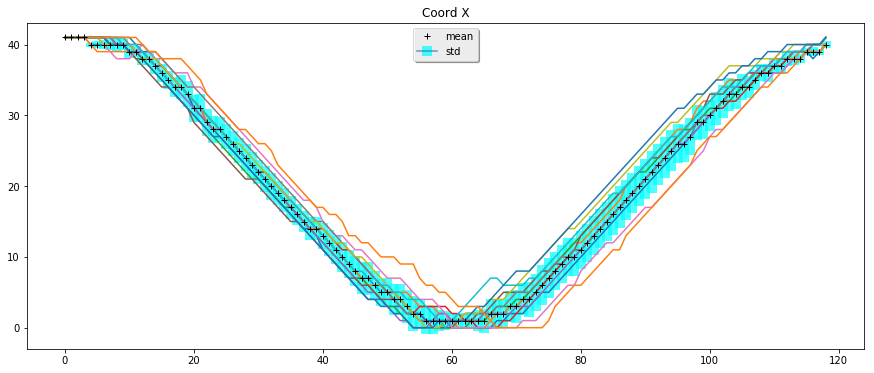

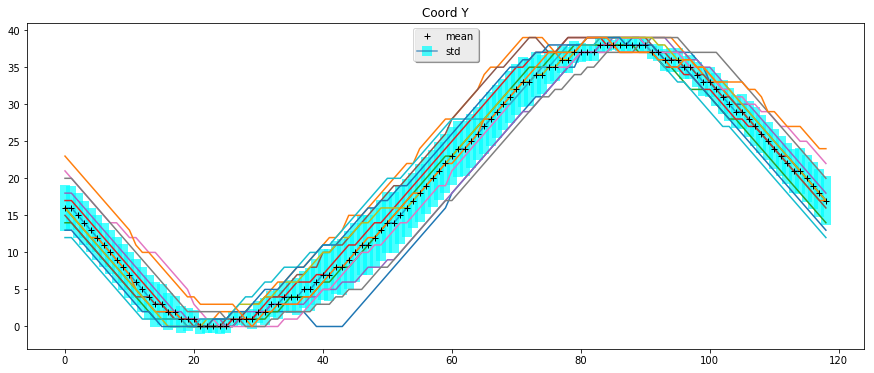

Original images


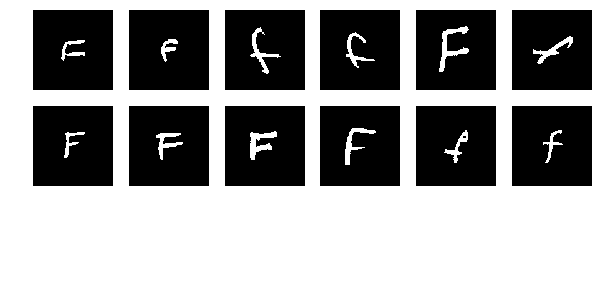

Shapes


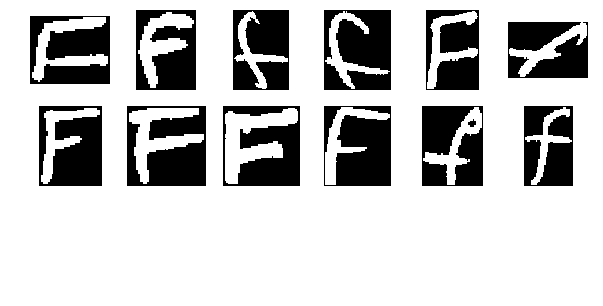

Shapes normalized


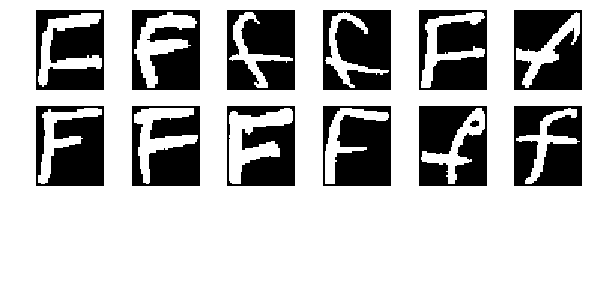

Contours


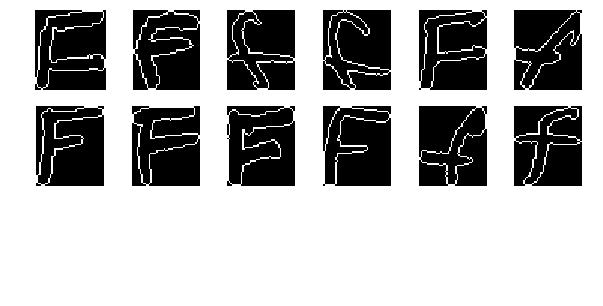

Arithmetic mean contour


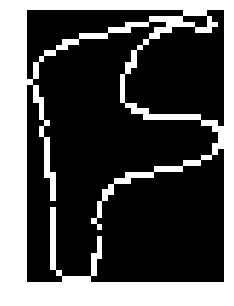

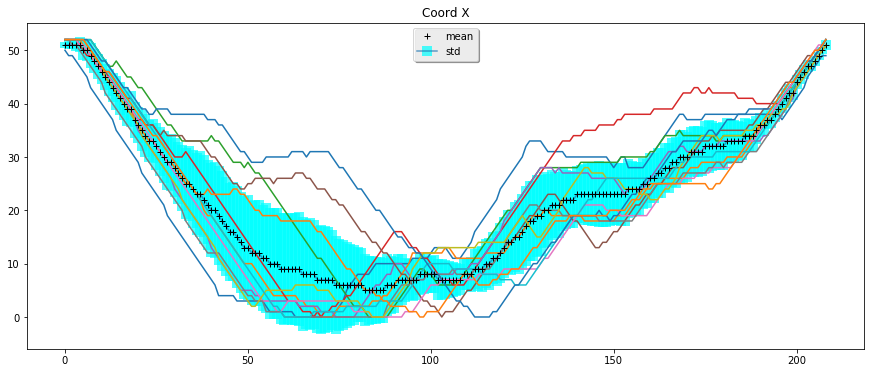

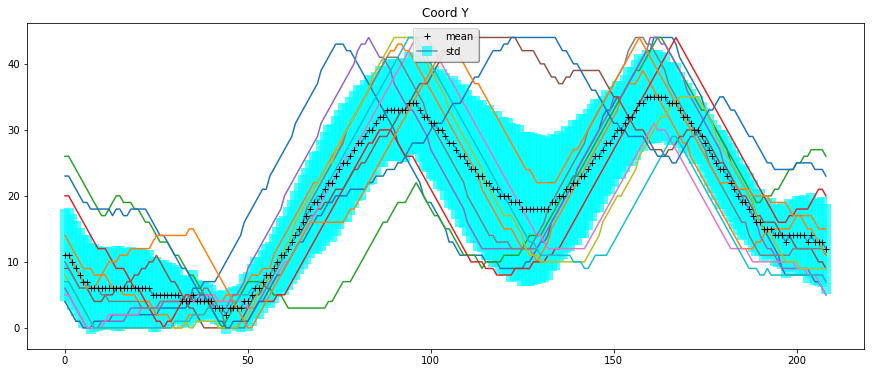

Original images


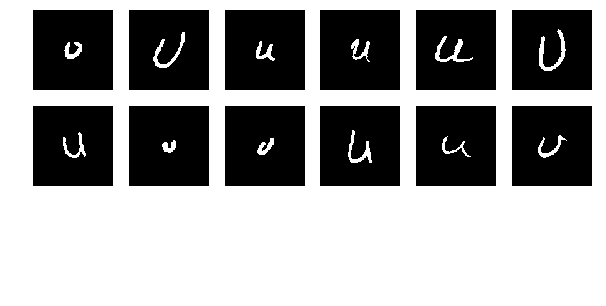

Shapes


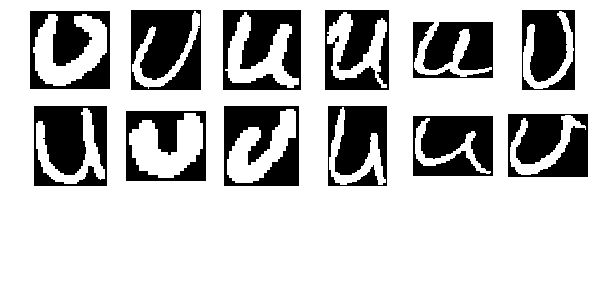

Shapes normalized


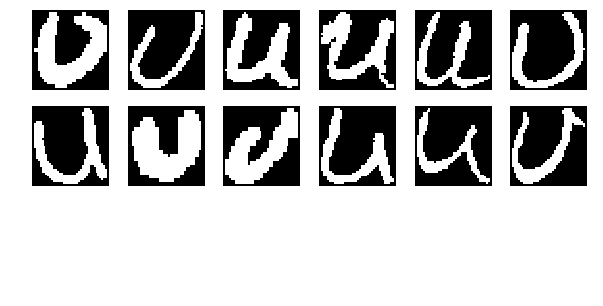

Contours


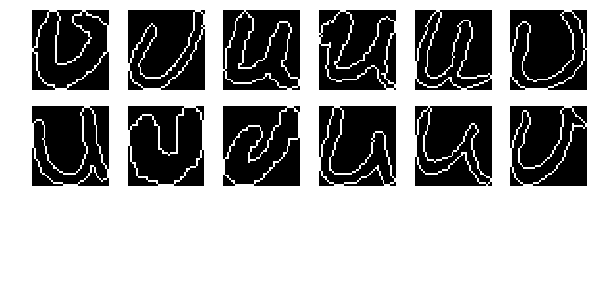

Arithmetic mean contour


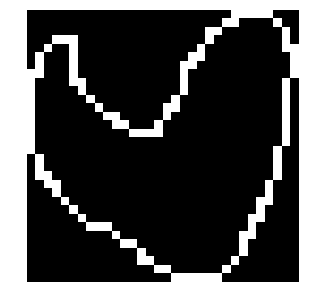

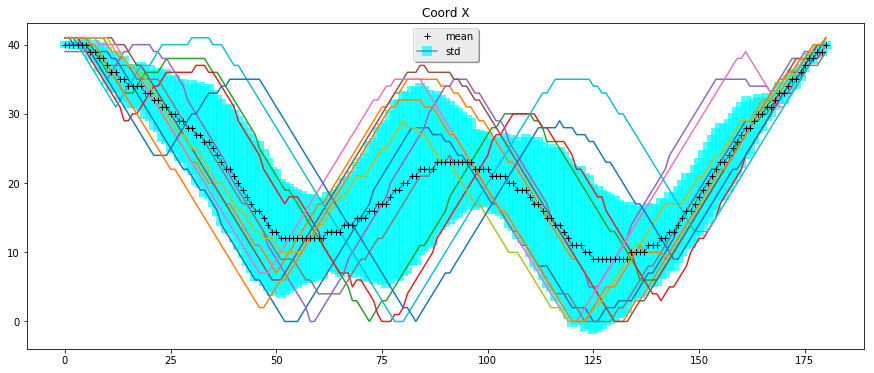

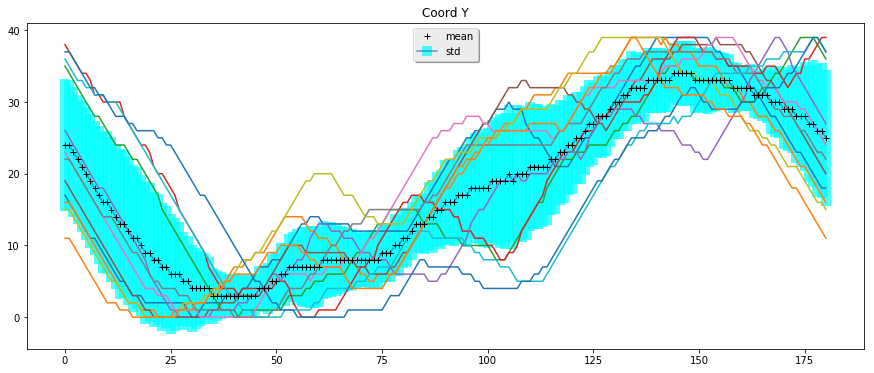

Original images


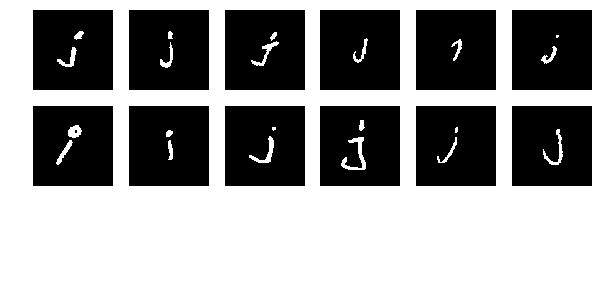

Shapes


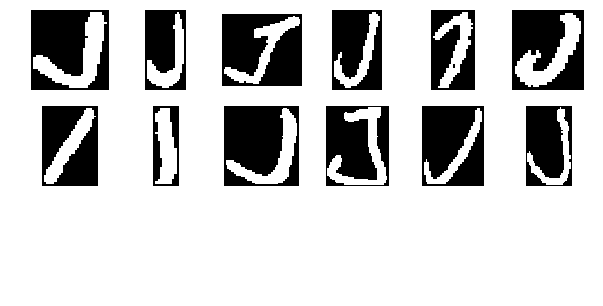

Shapes normalized


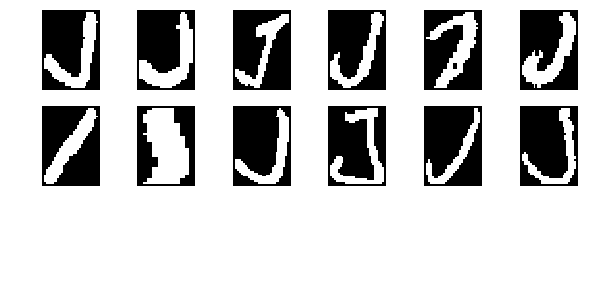

Contours


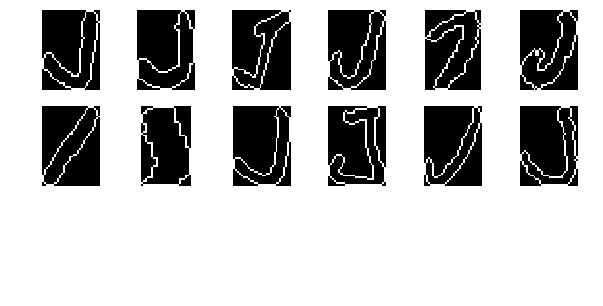

Arithmetic mean contour


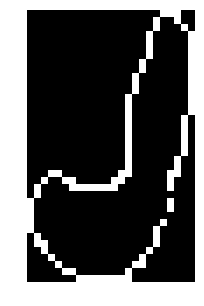

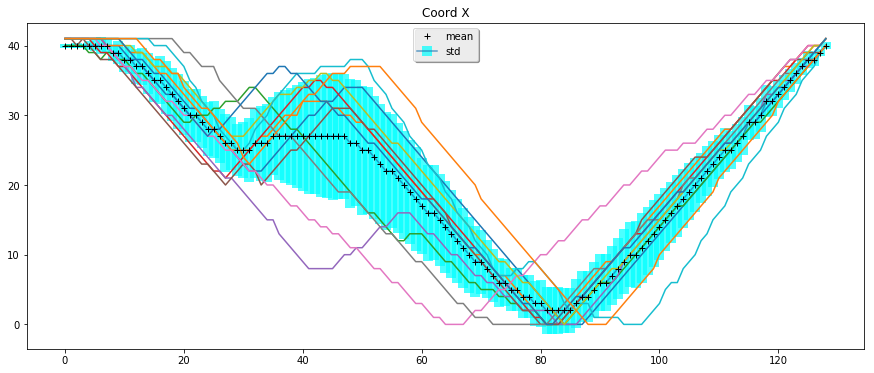

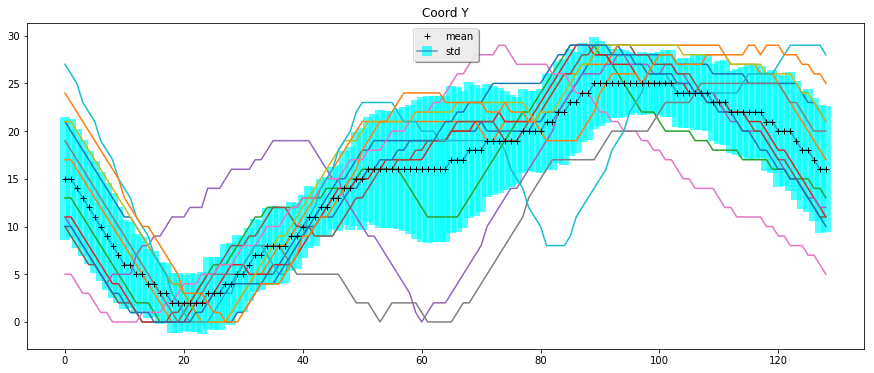

Original images


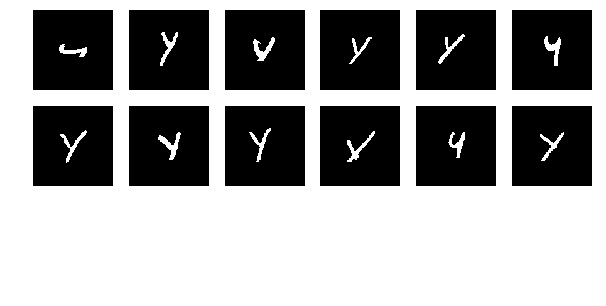

Shapes


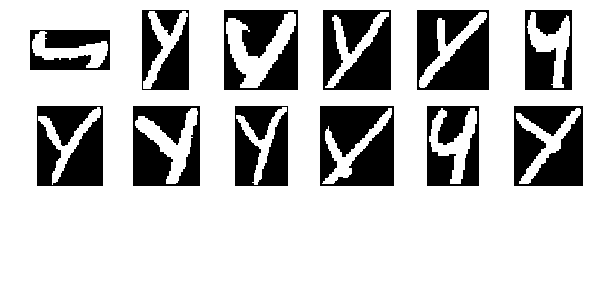

Shapes normalized


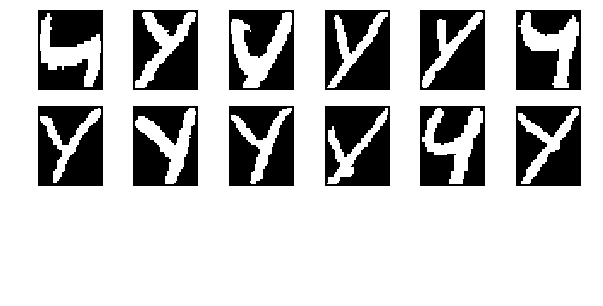

Contours


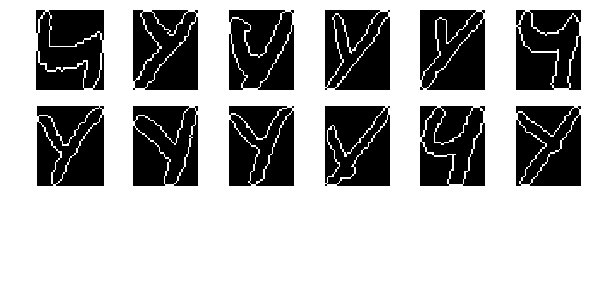

Arithmetic mean contour


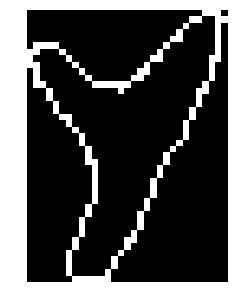

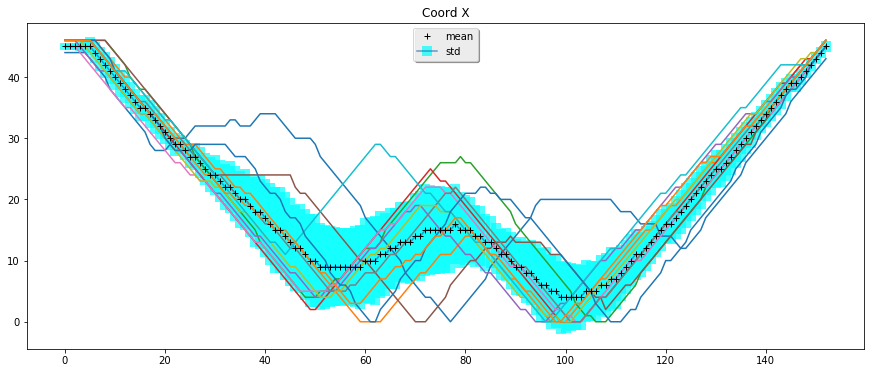

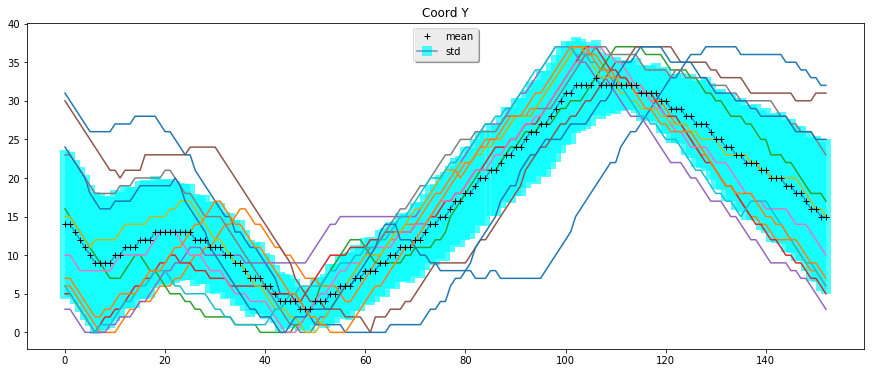

In [15]:
from sarpy import plotContour
from math import *
from scipy.misc import imresize
"""
Função principal 
"""
def shapeScale2(img, c):
    if type(c) == type((0,0)):
        h2 = floor(c[0])
        w2 = floor(c[1])
    else:
        raise ValueError('Error in arguments')
        
    h1,w1=img.shape
    x_ratio = w1/w2;
    y_ratio = h1/h2;    
    g = np.zeros(h2*w2)
    for i in range(h2):
        for j in range(w2):
            px = floor(j*x_ratio) ;
            py = floor(i*y_ratio) ;
            g[(i*w2)+j] = img[py][px];
    g = g.reshape(h2,w2)
    return g;

def contour2bm2 (c):
    if (type(c) == type(np.array(()))) & (c.shape[1] >= 3):        
        #
        copy = c.copy()
        copy = copy - np.min(copy,axis=0)
        #
        maxv = np.max(copy,axis=0)
        img = np.zeros((maxv[1]+1,maxv[2]+1), dtype='int8')
        for i in range(c.shape[0]):
            x = copy[i,1]
            y = copy[i,2]
            img[x,y] = 1
        return img;
    else:
        raise ValueError('Error: the argument has to be a contour')        
        
def bitmap2setPoints(bitmap,adj=4):
    adjx = []
    adjy = []
    if adj == 8:
        adjx = [-1,0,1,-1,1,-1,0,1];
        adjy = [-1,-1,-1,0,0,1,1,1];
    else:
        adjx = [0,-1,1,0];
        adjy = [-1,0,0,1];
        
    adjn = len(adjx)
    nrows,ncols = bitmap.shape
    setPoints = set();
    for i in range(0,nrows):
        for j in range(0,ncols):
            if bitmap[i,j] == 1:
                for dx,dy in zip(adjx,adjy):        
                    x = i + dx
                    y = j + dy
                    if x >= 0 and x < ncols and y >=0 and y < nrows:
                        if bitmap[x,y] == 0:                        
                            setPoints.add(tuple([x,y]))
    
    return np.asarray(list(setPoints))

def getBMnormalized(list_images):
    print("Original images")
    gridVisualize(list_images,6,(10,5),f_iden)
    list_bm = []
    for img in list_images:
        cc = extractContours.extract_contours(img)[0]
        smin = np.min(cc,axis=0)
        smax = np.max(cc,axis=0)
        xx = img[smin[1]:smax[1]+1,smin[2]:smax[2]+1] ## limit 1 pixel error
        list_bm.append(xx)
    
    print("Shapes")
    gridVisualize(list_bm,6,(10,5),f_iden)
        
    a = np.asarray([0,0])
    for img in list_bm:
        a = img.shape + a

    a = a/len(list_bm)
    list_normal = []    
    for img in list_bm:
        t = imresize(img,(floor(a[0]),floor(a[1])),'nearest','L')
#         (‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic’)
        t = np.where(t > 0 , 1, 0)  
        list_normal.append(t)
#         list_normal.append(shapeScale2(img,(a[0],a[1])))    
    print("Shapes normalized")
    gridVisualize(list_normal,6,(10,5),f_iden)
    
        
    return list_normal                   

def getCTnormalized(list_images):
    sum_peri = 0
    list_con = []
    for img in list_images:
        aContour = extractContours.extract_contours(img)
        sum_peri = sum_peri + len(aContour[0])
        list_con.append(aContour[0])
               
    numbins = int(sum_peri/len(list_con))
#     print(numbins)
    arr_x = np.arange(0,numbins)
    array_con = np.asarray(list_con)
    array_cont_ini = array_con.copy
    
    print("Contours")
    gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    
    for i in range(0,len(array_con)):        
        c = fun(array_con[i],numbins) # problem type in aContour        
        c = c - np.min(c,axis=0)
        array_con[i] = np.array(c)
    ##
    # gridVisualize(array_con,6,(10,5),plotContour.contour2bm)
    
    mm = np.mean(array_con,axis=0)
    std = np.std(array_con,axis=0)
    ##
    mm_n = mm - np.min(mm,axis=0)
    size = np.max(mm_n,axis=0)
    img_mm = np.zeros((int(size[1])+1,int(size[2])+1))
    print("Arithmetic mean contour")
    for b in mm_n:
        img_mm[int(b[1])][int(b[2])] = 1
    plt.imshow(img_mm,cmap='gray')
    plt.axis('off')
    plt.show()
    ##
    plt.rcParams["figure.figsize"] = [15,6]
    for idx,title in zip([1,2],["Coord X","Coord Y"]):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for contour in array_con:
            ax.plot(arr_x, contour[:,idx])        
        ax.plot(arr_x, mm[:,idx],'+', color="black",label='mean')
        plt.title(title)
        plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7,label='std')
        
        legend = ax.legend(loc='upper center', shadow=True)
        frame = legend.get_frame()
        plt.show()
    
# for c in range(0,62,10):
for c in range(0,62,15):
    list_images = [];
    for i in range(c*100,c*100+12):
        list_images.append(dataset['bitmaps'][i])
    
    lCont = getBMnormalized(list_images)
    ctnorm = getCTnormalized(lCont)    